### Step 1: **Understand the Data**
1. **Data Structure:**  
   - Review the column descriptions and identify key fields like:
     - `Proposed Units`, `Affordable Units`, `Net Units`
     - Income-related columns (`Extremely Low Income`, `Very Low Income`, etc.)
     - `Supervisor District`, `Analysis Neighborhood`, `Zoning District`

2. **Missing Values:**  
   - Identify columns with missing values, e.g., `Affordable Units Estimate`, `Project Affordability Type`, and `Plan Area`.

3. **Data Types:**  
   - Convert date columns (`First Completion Date`, `Issued Date`, etc.) to `datetime` for better analysis.

---

### Step 2: **Data Cleaning**
1. **Handle Missing Values:**  
   - Decide how to impute or drop missing values based on their relevance and distribution.

2. **Standardize Formats:**  
   - Ensure numerical columns do not contain unexpected text.
   - Parse columns like `Affordable Units Estimate` if they contain text representations of numbers.

---

### Step 3: **Exploratory Data Analysis (EDA)**
1. **Descriptive Statistics:**
   - Summary statistics for numerical columns like `Net Units`, `Market Rate`, `Affordable Units`.

2. **Distribution Analysis:**
   - Plot distributions of key metrics (`Proposed Units`, `Affordable Units`, etc.) using histograms or KDE plots.

3. **Category Analysis:**
   - Analyze counts and proportions for categorical columns like `Zoning District` and `Project Affordability Type`.

4. **Temporal Trends:**
   - Plot trends over time (e.g., `First Completion Date`) to identify patterns in housing production.

5. **Spatial Analysis:**
   - Group data by `Supervisor District` or `Analysis Neighborhood` to assess regional distribution.

---

### Step 4: **Key Questions to Explore**
1. **What is the proportion of affordable housing units to market-rate units?**
   - Calculate and visualize ratios across neighborhoods or districts.

2. **How are housing units distributed by income level?**
   - Assess distributions across `Extremely Low Income`, `Low Income`, etc.

3. **What are the trends in housing production over time?**
   - Analyze and plot completions or proposed units over time.

4. **Which neighborhoods/districts have the most/least affordable housing?**
   - Group data by `Analysis Neighborhood` and summarize key metrics.

5. **What are the most common zoning types for affordable housing projects?**
   - Analyze `Zoning District` for affordable housing.

---

### Step 5: **Visualization Ideas**
1. **Bar Charts:**  
   - Number of affordable vs. market-rate units per neighborhood/district.

2. **Line Charts:**  
   - Trends in total, affordable, and market-rate units over time.

3. **Pie Charts/Donuts:**  
   - Proportion of housing types by income levels.

4. **Geospatial Maps:**  
   - Map projects by `Address` or `Supervisor District` for visual insights.

5. **Heatmaps:**  
   - Correlation matrix of numerical features to uncover relationships.

---

### Step 6: **Advanced Analysis**
1. **Regression Analysis:**
   - Examine factors affecting the number of affordable units.

2. **Clustering:**
   - Cluster neighborhoods or projects based on housing characteristics.

3. **Forecasting:**
   - Use time-series models to predict future housing trends.



In [1]:
# Loading the data set
import pandas as pd
file_path = "Data/Housing_Production.csv"
df = pd.read_csv(file_path)
df.head(10)

,BPA,Address,Description,PTS Existing Units,PTS Proposed Units,Proposed Units,Net Units,Net Units Completed,First Completion Date,Latest Completion Date,...,Planning Dist.,Plan Area,Form No.,Permit Type,Issued Date,Authorization Date,Zoning District,Project Affordability Type,BlockLot,PPTS Project ID
0,201602089004,950 MARKET ST,"TO ERECT 13 STORIES, 2 BASEMENTS, TYPE I-A, 47...",0,470,470,470,242,09/03/2021 12:00:00 AM,11/12/2021 12:00:00 AM,...,4 - Downtown,Downtown,1,Site Permit,12/14/2017 12:00:00 AM,04/08/2019 12:00:00 AM,C-3-G,Inclu: Land Dedication,0342001,2013.1049
1,201611283577,30 OTIS ST,"TO ERECT 27 STORIES, 2 BASEMENT, TYPE I-A, 404...",0,404,404,404,395,07/19/2021 12:00:00 AM,08/06/2021 12:00:00 AM,...,8 - Mission,Downtown,1,Site Permit,01/22/2019 12:00:00 AM,08/09/2019 12:00:00 AM,C-3-G,Inclu: Fee Payment,3505016,2015-010013PRJ
2,201306210213,2171 03RD ST,"TO ERECT 7 STORIES,1 BASEMENT, TYPE IB, 109 UN...",0,109,109,109,104,07/15/2020 12:00:00 AM,07/15/2020 12:00:00 AM,...,9 - South of Market,Mission Bay,1,Site Permit,06/08/2017 12:00:00 AM,12/27/2017 12:00:00 AM,UMU,Inclu: On-Site BMR,4045003,2013.0784
3,201801128565,1856 PACIFIC AV,"PER ADU UNIT ORDINANCE# 162-16, CONVERT GROUND...",11,16,16,5,1,08/11/2020 12:00:00 AM,08/11/2020 12:00:00 AM,...,2 - Marina,NaN,3,Full BP,07/11/2019 12:00:00 AM,07/11/2019 12:00:00 AM,RH-2,NaN,0576011,2018-001265PRJ
4,9824818,1328 MISSION ST,4 STORY (12 LIVE WORK) 1 STORY PARKING,0,12,12,12,12,04/02/2016 12:00:00 AM,04/02/2016 12:00:00 AM,...,4 - Downtown,Downtown,2,Full BP,08/16/1999 12:00:00 AM,08/16/1999 12:00:00 AM,C-3-G,Inclu: On-Site BMR,3508020,1998.940
5,200005028846,638 19th St,to erect 24 dwelling units (4 stories) with c...,0,24,18,18,18,06/03/2010 12:00:00 AM,06/03/2010 12:00:00 AM,...,9 - South of Market,Mission Bay,2,Site Permit,04/01/2003 12:00:00 AM,09/25/2003 12:00:00 AM,UMU,Inclu: On-Site BMR,4044030,2002.0184
6,200006172951,200 BRANNAN ST,TO ERECT 189 DWELLING UNITS,0,189,191,191,191,08/31/2006 12:00:00 AM,08/31/2006 12:00:00 AM,...,9 - South of Market,Rincon Hill,1,Site Permit,10/03/2000 12:00:00 AM,12/26/2001 12:00:00 AM,SB-DTR,Inclu: On-Site BMR,3774024,NaN
7,200007175308,77 Van Ness Av,"TO ERECT A 8 STORIES, 50 UNITS RESIDENTIAL BU...",0,50,50,50,50,08/25/2009 12:00:00 AM,08/25/2009 12:00:00 AM,...,5 - Western Addition,NaN,1,Site Permit,08/16/2006 12:00:00 AM,12/13/2006 12:00:00 AM,C-3-G,Inclu: On-Site BMR,0834022,2000.074
8,200008299159,69 Clementina St,erect a seven story office bldg,0,0,18,18,18,03/24/2006 12:00:00 AM,03/24/2006 12:00:00 AM,...,9 - South of Market,Yerba Buena,1,Site Permit,12/20/2000 12:00:00 AM,01/22/2001 12:00:00 AM,C-3-O(SD),Inclu: On-Site BMR,3736036,2000.191
9,200009090078,6901 Geary Bl,to erect 15 units residential 5 comm'l,0,15,15,15,15,04/14/2006 12:00:00 AM,04/14/2006 12:00:00 AM,...,1 - Richmond,Geary Corridor,2,Site Permit,04/21/2004 12:00:00 AM,05/21/2004 12:00:00 AM,NC-1,Inclu: On-Site BMR,1511001,2001.0446


In [2]:
print(df.columns.tolist())

['BPA', 'Address', 'Description', 'PTS Existing Units', 'PTS Proposed Units', 'Proposed Units', 'Net Units', 'Net Units Completed', 'First Completion Date', 'Latest Completion Date', 'Extremely Low Income', 'Very Low Income', 'Low Income', 'Moderate Income', 'Moderate Income - NDR', 'Affordable Units', 'Market Rate', 'Affordable Units Estimate', 'Supervisor District', 'Analysis Neighborhood', 'Planning Dist.', 'Plan Area', 'Form No.', 'Permit Type', 'Issued Date', 'Authorization Date', 'Zoning District', 'Project Affordability Type', 'BlockLot', 'PPTS Project ID']


In [3]:
# checking for missing values
print(df.isnull().sum())

BPA                              0
Address                          0
Description                      2
PTS Existing Units               0
PTS Proposed Units               0
Proposed Units                   0
Net Units                        0
Net Units Completed              0
First Completion Date            0
Latest Completion Date           0
Extremely Low Income             0
Very Low Income                  0
Low Income                       0
Moderate Income                  0
Moderate Income - NDR            0
Affordable Units                 0
Market Rate                      0
Affordable Units Estimate     4946
Supervisor District              0
Analysis Neighborhood            0
Planning Dist.                   0
Plan Area                     3510
Form No.                         0
Permit Type                      0
Issued Date                      0
Authorization Date               0
Zoning District                  0
Project Affordability Type    4502
BlockLot            

In [4]:
# Summary
print(df.describe(include='all'))

                 BPA         Address  \
count           5188            5188   
unique          5188            4761   
top     201309277932  200 CAMERON WY   
freq               1              33   
mean             NaN             NaN   
std              NaN             NaN   
min              NaN             NaN   
25%              NaN             NaN   
50%              NaN             NaN   
75%              NaN             NaN   
max              NaN             NaN   

                                              Description  PTS Existing Units  \
count                                                5186         5188.000000   
unique                                               4745                 NaN   
top     ERECT 3-STORY, TYPE 5-B, NO BASEMENT, SINGLE F...                 NaN   
freq                                                   40                 NaN   
mean                                                  NaN            4.995567   
std                              

In [5]:
# Cleaning the data
# Eliminate column with the most missing values (Affordable Units estimate)
df.drop(['Affordable Units Estimate', 'Project Affordability Type', 'Plan Area'], axis=1, inplace=True)

In [6]:
print(df.columns.tolist())

['BPA', 'Address', 'Description', 'PTS Existing Units', 'PTS Proposed Units', 'Proposed Units', 'Net Units', 'Net Units Completed', 'First Completion Date', 'Latest Completion Date', 'Extremely Low Income', 'Very Low Income', 'Low Income', 'Moderate Income', 'Moderate Income - NDR', 'Affordable Units', 'Market Rate', 'Supervisor District', 'Analysis Neighborhood', 'Planning Dist.', 'Form No.', 'Permit Type', 'Issued Date', 'Authorization Date', 'Zoning District', 'BlockLot', 'PPTS Project ID']


In [7]:
# Number of Rows and Columns
df.shape

(5188, 27)

In [8]:
df.isnull().sum()

BPA                          0
Address                      0
Description                  2
PTS Existing Units           0
PTS Proposed Units           0
Proposed Units               0
Net Units                    0
Net Units Completed          0
First Completion Date        0
Latest Completion Date       0
Extremely Low Income         0
Very Low Income              0
Low Income                   0
Moderate Income              0
Moderate Income - NDR        0
Affordable Units             0
Market Rate                  0
Supervisor District          0
Analysis Neighborhood        0
Planning Dist.               0
Form No.                     0
Permit Type                  0
Issued Date                  0
Authorization Date           0
Zoning District              0
BlockLot                     0
PPTS Project ID           1406
dtype: int64

In [9]:
# Standardize and Parse dates
df['First Completion Date']=pd.to_datetime(df['First Completion Date'], errors='coerce')
df['Latest Completion Date']=pd.to_datetime(df['Latest Completion Date'], errors='coerce')
df['Issued Date']=pd.to_datetime(df['Issued Date'], errors='coerce')
df['Authorization Date']=pd.to_datetime(df['Authorization Date'], errors='coerce')

C:\Users\kyend\AppData\Local\Temp\ipykernel_7880\1195680358.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['First Completion Date']=pd.to_datetime(df['First Completion Date'], errors='coerce')
C:\Users\kyend\AppData\Local\Temp\ipykernel_7880\1195680358.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Latest Completion Date']=pd.to_datetime(df['Latest Completion Date'], errors='coerce')
C:\Users\kyend\AppData\Local\Temp\ipykernel_7880\1195680358.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Issued Date']=pd.to_datetime(df['Issued Date'], errors='coer

In [10]:
df.head(5)

,BPA,Address,Description,PTS Existing Units,PTS Proposed Units,Proposed Units,Net Units,Net Units Completed,First Completion Date,Latest Completion Date,...,Supervisor District,Analysis Neighborhood,Planning Dist.,Form No.,Permit Type,Issued Date,Authorization Date,Zoning District,BlockLot,PPTS Project ID
0,201602089004,950 MARKET ST,"TO ERECT 13 STORIES, 2 BASEMENTS, TYPE I-A, 47...",0,470,470,470,242,2021-09-03,2021-11-12,...,6,Tenderloin,4 - Downtown,1,Site Permit,2017-12-14,2019-04-08,C-3-G,0342001,2013.1049
1,201611283577,30 OTIS ST,"TO ERECT 27 STORIES, 2 BASEMENT, TYPE I-A, 404...",0,404,404,404,395,2021-07-19,2021-08-06,...,6,Mission,8 - Mission,1,Site Permit,2019-01-22,2019-08-09,C-3-G,3505016,2015-010013PRJ
2,201306210213,2171 03RD ST,"TO ERECT 7 STORIES,1 BASEMENT, TYPE IB, 109 UN...",0,109,109,109,104,2020-07-15,2020-07-15,...,10,Potrero Hill,9 - South of Market,1,Site Permit,2017-06-08,2017-12-27,UMU,4045003,2013.0784
3,201801128565,1856 PACIFIC AV,"PER ADU UNIT ORDINANCE# 162-16, CONVERT GROUND...",11,16,16,5,1,2020-08-11,2020-08-11,...,2,Pacific Heights,2 - Marina,3,Full BP,2019-07-11,2019-07-11,RH-2,0576011,2018-001265PRJ
4,9824818,1328 MISSION ST,4 STORY (12 LIVE WORK) 1 STORY PARKING,0,12,12,12,12,2016-04-02,2016-04-02,...,6,South of Market,4 - Downtown,2,Full BP,1999-08-16,1999-08-16,C-3-G,3508020,1998.940


In [11]:
# # Extract useful info like yeah and month from date columns
# df['Completion Year'] = df['First Completion Date'].dt.year

In [12]:
df.head(10)

,BPA,Address,Description,PTS Existing Units,PTS Proposed Units,Proposed Units,Net Units,Net Units Completed,First Completion Date,Latest Completion Date,...,Supervisor District,Analysis Neighborhood,Planning Dist.,Form No.,Permit Type,Issued Date,Authorization Date,Zoning District,BlockLot,PPTS Project ID
0,201602089004,950 MARKET ST,"TO ERECT 13 STORIES, 2 BASEMENTS, TYPE I-A, 47...",0,470,470,470,242,2021-09-03,2021-11-12,...,6,Tenderloin,4 - Downtown,1,Site Permit,2017-12-14,2019-04-08,C-3-G,0342001,2013.1049
1,201611283577,30 OTIS ST,"TO ERECT 27 STORIES, 2 BASEMENT, TYPE I-A, 404...",0,404,404,404,395,2021-07-19,2021-08-06,...,6,Mission,8 - Mission,1,Site Permit,2019-01-22,2019-08-09,C-3-G,3505016,2015-010013PRJ
2,201306210213,2171 03RD ST,"TO ERECT 7 STORIES,1 BASEMENT, TYPE IB, 109 UN...",0,109,109,109,104,2020-07-15,2020-07-15,...,10,Potrero Hill,9 - South of Market,1,Site Permit,2017-06-08,2017-12-27,UMU,4045003,2013.0784
3,201801128565,1856 PACIFIC AV,"PER ADU UNIT ORDINANCE# 162-16, CONVERT GROUND...",11,16,16,5,1,2020-08-11,2020-08-11,...,2,Pacific Heights,2 - Marina,3,Full BP,2019-07-11,2019-07-11,RH-2,0576011,2018-001265PRJ
4,9824818,1328 MISSION ST,4 STORY (12 LIVE WORK) 1 STORY PARKING,0,12,12,12,12,2016-04-02,2016-04-02,...,6,South of Market,4 - Downtown,2,Full BP,1999-08-16,1999-08-16,C-3-G,3508020,1998.940
5,200005028846,638 19th St,to erect 24 dwelling units (4 stories) with c...,0,24,18,18,18,2010-06-03,2010-06-03,...,10,Potrero Hill,9 - South of Market,2,Site Permit,2003-04-01,2003-09-25,UMU,4044030,2002.0184
6,200006172951,200 BRANNAN ST,TO ERECT 189 DWELLING UNITS,0,189,191,191,191,2006-08-31,2006-08-31,...,6,Financial District/South Beach,9 - South of Market,1,Site Permit,2000-10-03,2001-12-26,SB-DTR,3774024,NaN
7,200007175308,77 Van Ness Av,"TO ERECT A 8 STORIES, 50 UNITS RESIDENTIAL BU...",0,50,50,50,50,2009-08-25,2009-08-25,...,6,Hayes Valley,5 - Western Addition,1,Site Permit,2006-08-16,2006-12-13,C-3-G,0834022,2000.074
8,200008299159,69 Clementina St,erect a seven story office bldg,0,0,18,18,18,2006-03-24,2006-03-24,...,6,Financial District/South Beach,9 - South of Market,1,Site Permit,2000-12-20,2001-01-22,C-3-O(SD),3736036,2000.191
9,200009090078,6901 Geary Bl,to erect 15 units residential 5 comm'l,0,15,15,15,15,2006-04-14,2006-04-14,...,1,Outer Richmond,1 - Richmond,2,Site Permit,2004-04-21,2004-05-21,NC-1,1511001,2001.0446


# Exploratory Data Analysis

In [13]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5188 entries, 0 to 5187
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BPA                     5188 non-null   object        
 1   Address                 5188 non-null   object        
 2   Description             5186 non-null   object        
 3   PTS Existing Units      5188 non-null   int64         
 4   PTS Proposed Units      5188 non-null   int64         
 5   Proposed Units          5188 non-null   int64         
 6   Net Units               5188 non-null   int64         
 7   Net Units Completed     5188 non-null   int64         
 8   First Completion Date   5188 non-null   datetime64[ns]
 9   Latest Completion Date  5188 non-null   datetime64[ns]
 10  Extremely Low Income    5188 non-null   int64         
 11  Very Low Income         5188 non-null   int64         
 12  Low Income              5188 non-null   int64   

In [14]:
# Any left missing values
df.isnull().sum()

BPA                          0
Address                      0
Description                  2
PTS Existing Units           0
PTS Proposed Units           0
Proposed Units               0
Net Units                    0
Net Units Completed          0
First Completion Date        0
Latest Completion Date       0
Extremely Low Income         0
Very Low Income              0
Low Income                   0
Moderate Income              0
Moderate Income - NDR        0
Affordable Units             0
Market Rate                  0
Supervisor District          0
Analysis Neighborhood        0
Planning Dist.               0
Form No.                     0
Permit Type                  0
Issued Date                  0
Authorization Date           0
Zoning District              0
BlockLot                     0
PPTS Project ID           1406
dtype: int64

# Univariate Analysis

<Axes: >

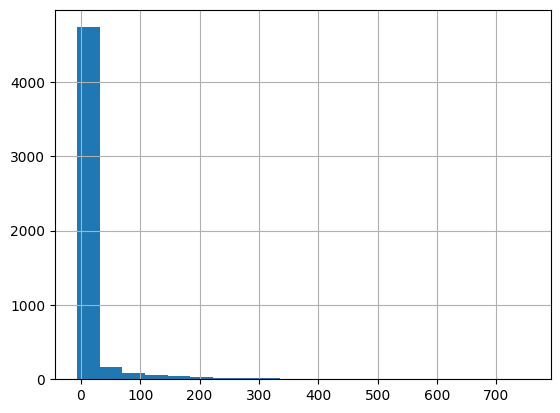

In [15]:
# Plot distributions of ey numerial columns like Proposed Units, Affordable Units, Net Units
df['Proposed Units'].hist(bins=20)

<Axes: >

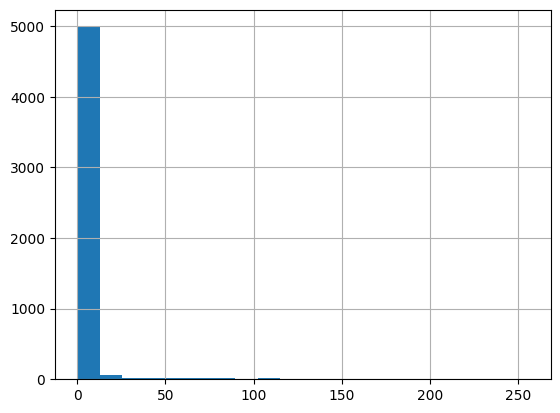

In [16]:
df['Affordable Units'].hist(bins=20)

<Axes: >

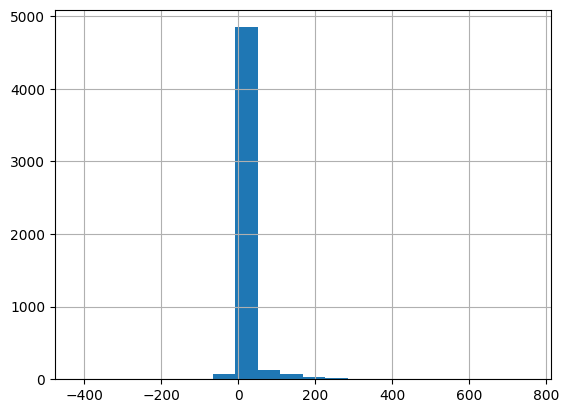

In [17]:
df['Net Units'].hist(bins=20)

<Axes: xlabel='Zoning District'>

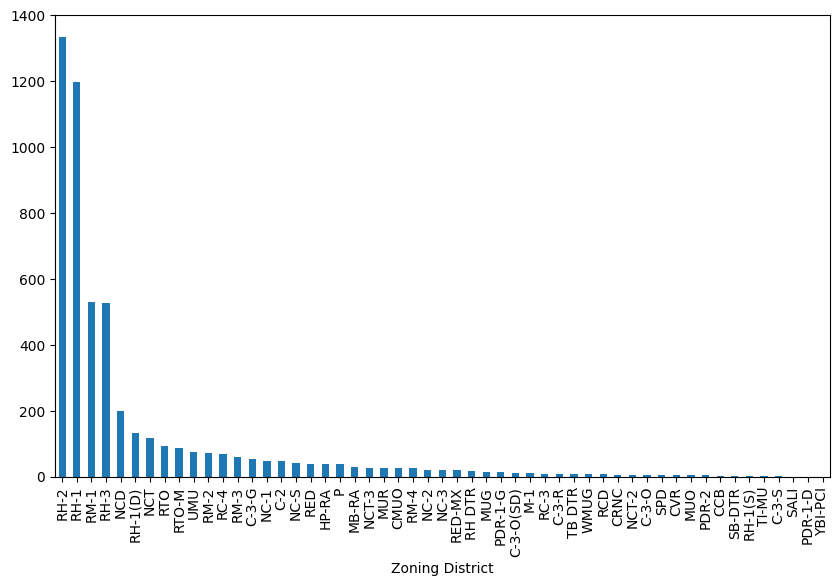

In [18]:
# Display counts for categorical variables like Zoning District or Project Affordability
df['Zoning District'].value_counts().plot(kind='bar', figsize=(10, 6))

 # Bivariate Analysis

<Axes: >

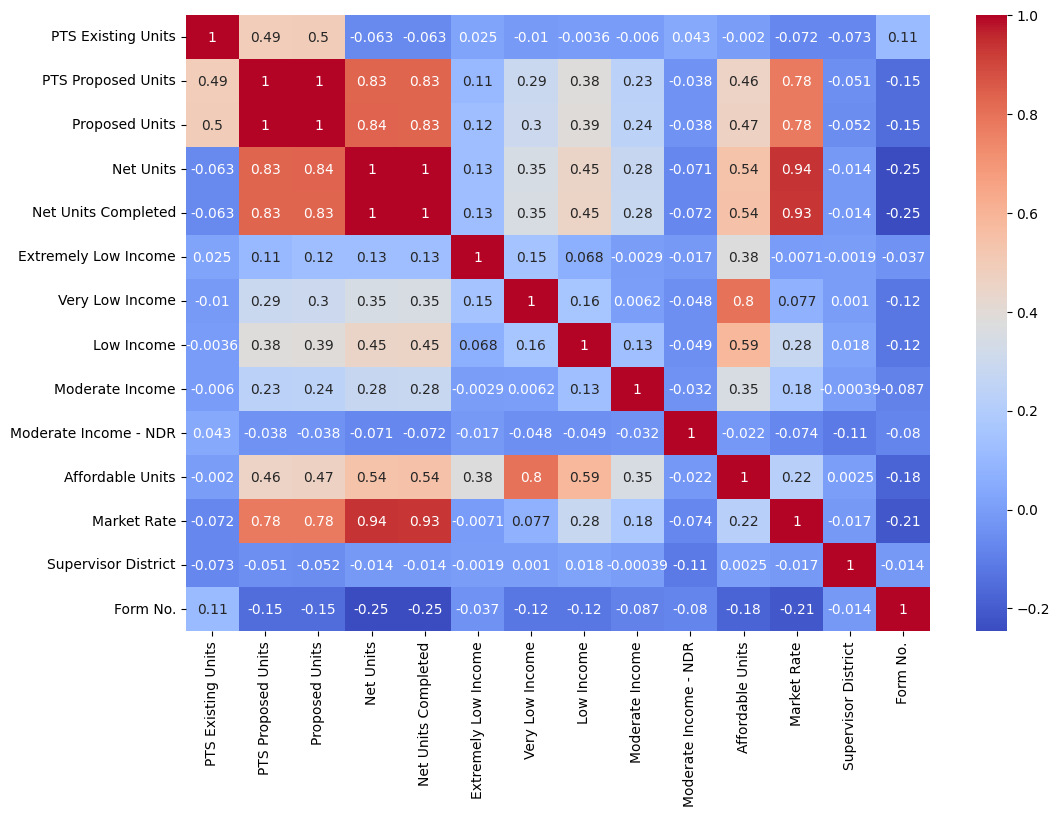

In [19]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Only select numeric values
numeric_data=df.select_dtypes(include=['number'])
# compute corr matrix
correlation_matrix=numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='Zoning District', ylabel='Affordable Units'>

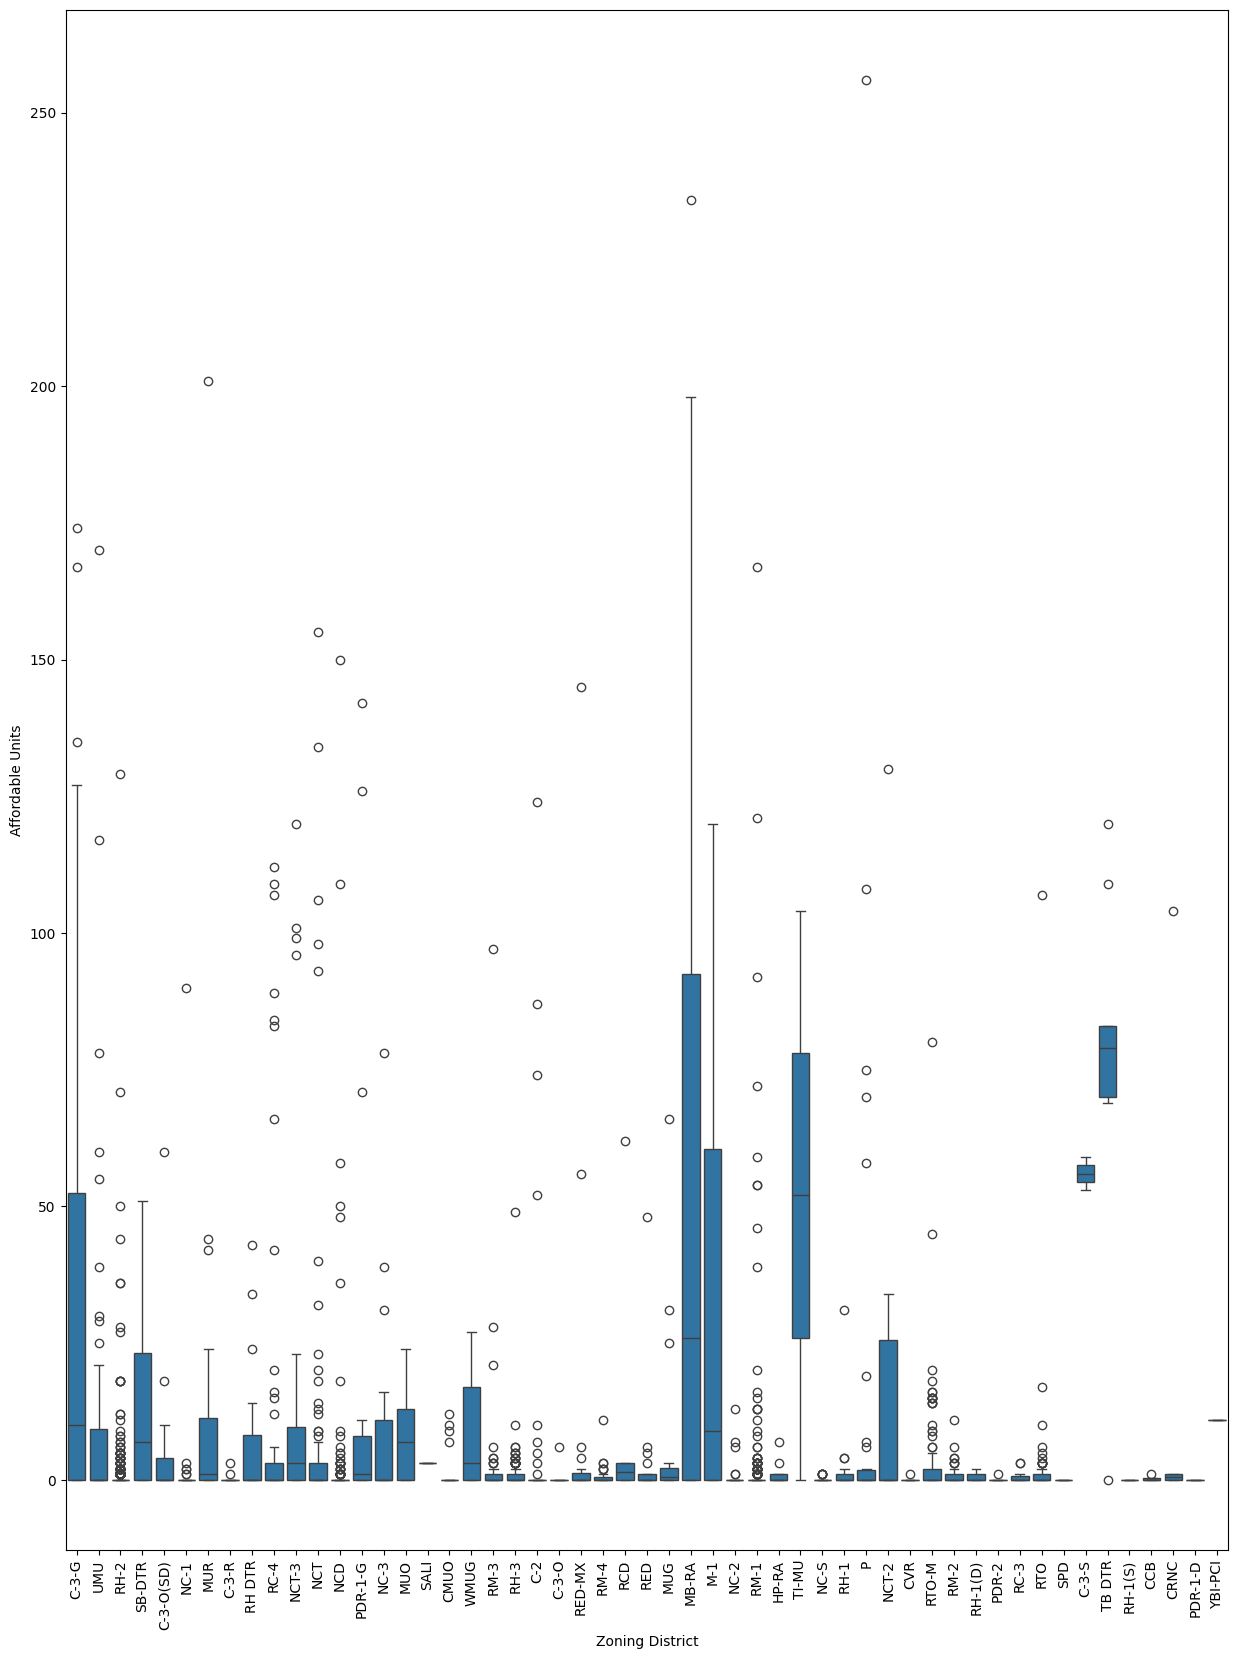

In [20]:
# Numerical vs Categorical
plt.figure(figsize=(15, 20))
plt.xticks(rotation=90)
sns.boxplot(data=df, x='Zoning District', y='Affordable Units')

<Axes: xlabel='First Completion Date'>

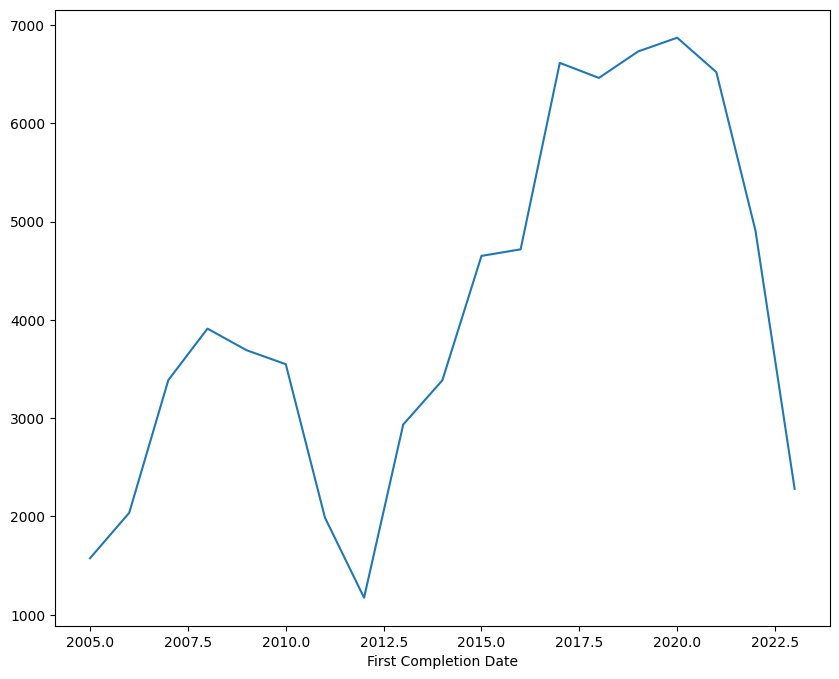

In [21]:
# Temporoal Trends
plt.figure(figsize=(10, 8))
df.groupby(df['First Completion Date'].dt.year)['Proposed Units'].sum().plot(kind='line')

# Multivariate Analysis

array([[<Axes: xlabel='Proposed Units', ylabel='Proposed Units'>,
        <Axes: xlabel='Affordable Units', ylabel='Proposed Units'>,
        <Axes: xlabel='Market Rate', ylabel='Proposed Units'>],
       [<Axes: xlabel='Proposed Units', ylabel='Affordable Units'>,
        <Axes: xlabel='Affordable Units', ylabel='Affordable Units'>,
        <Axes: xlabel='Market Rate', ylabel='Affordable Units'>],
       [<Axes: xlabel='Proposed Units', ylabel='Market Rate'>,
        <Axes: xlabel='Affordable Units', ylabel='Market Rate'>,
        <Axes: xlabel='Market Rate', ylabel='Market Rate'>]], dtype=object)

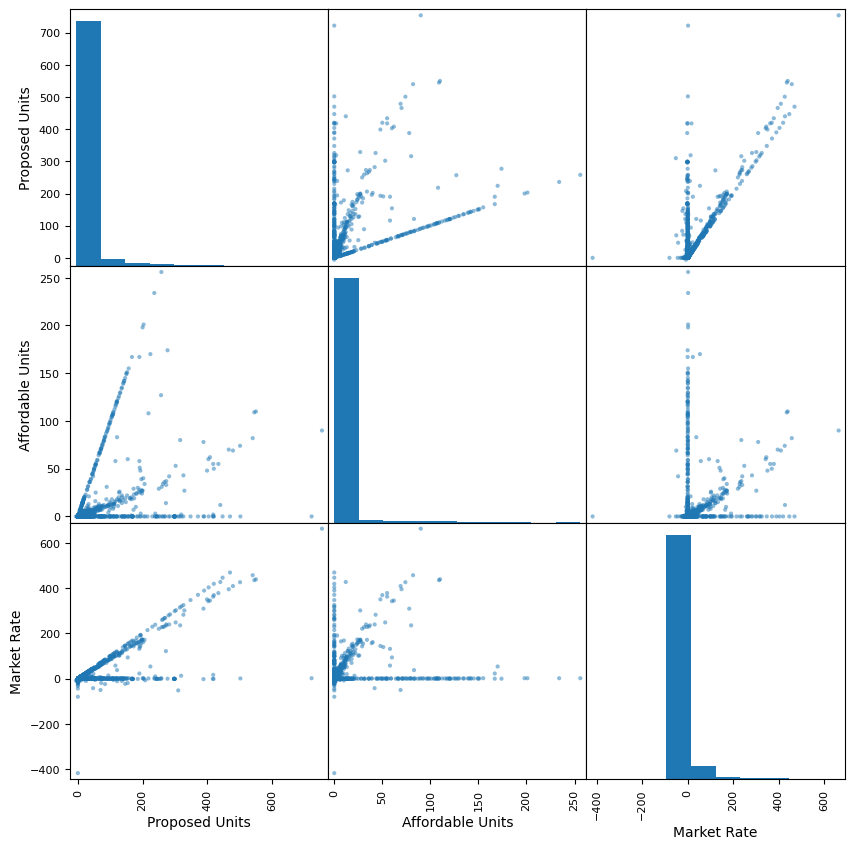

In [22]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['Proposed Units', 'Affordable Units', 'Market Rate']], figsize=(10, 10))

<Axes: xlabel='Supervisor District'>

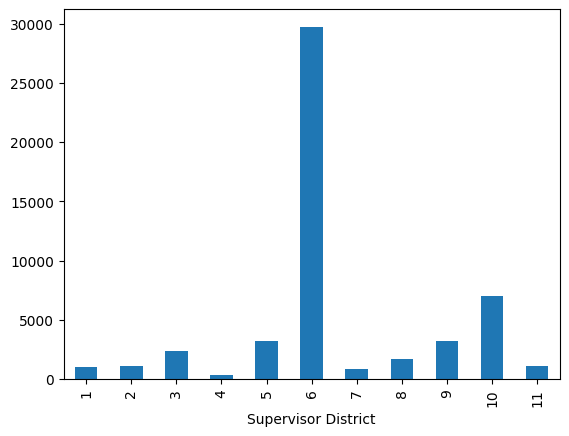

In [23]:
# Compare regions to see housing production distribution
df.groupby('Supervisor District')['Net Units'].sum().plot(kind='bar')

### What proportion of units are affordable?

<Axes: >

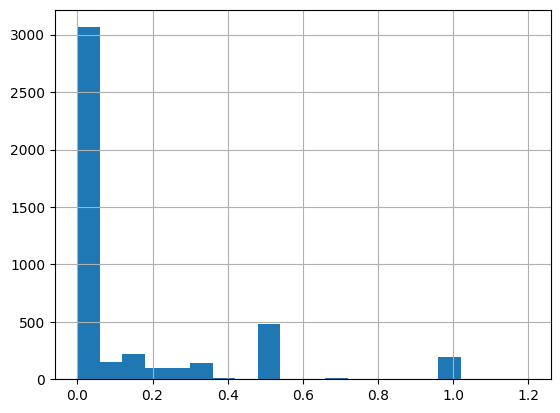

In [24]:
df['Affordability Ratio'] = df['Affordable Units'] / df['Proposed Units']
df['Affordability Ratio'].hist(bins=20)

### Which regions have the most/least affordable housing?

<Axes: xlabel='Supervisor District'>

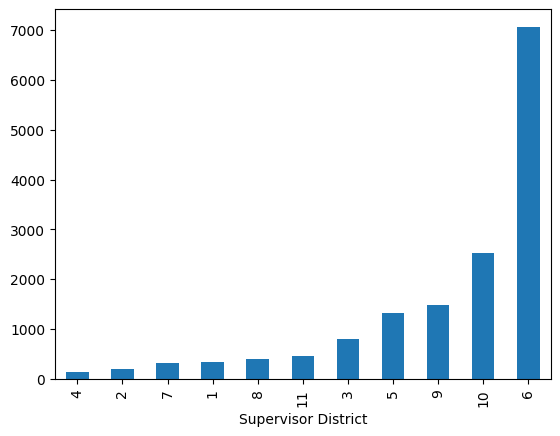

In [25]:
df.groupby('Supervisor District')['Affordable Units'].sum().sort_values().plot(kind='bar')

### What are the trends in housing production over time?

<Axes: xlabel='Year'>

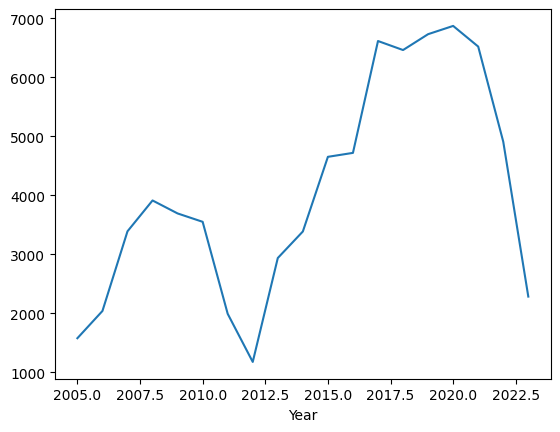

In [26]:
df['Year'] = df['First Completion Date'].dt.year
df.groupby('Year')['Proposed Units'].sum().plot(kind='line')